In [25]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [26]:
# get a list with all files inside the folder dataframes_w_chen_classes
 
all_df_files = glob('dataframes_w_chen_classes/*.csv')
all_dfs = [pd.read_csv(f) for f in all_df_files]

In [29]:
def visualize_phenomena(all_dfs):
    """
    Merge all DataFrames and plot:
    1) class_1 frequency
    2) class_2 frequency
    3) class_3 frequency
    4) boxplot of prob_1, prob_2, prob_3
    5) boxplot of prob_1 grouped by class_1
    """
    combined_df = pd.concat(all_dfs, ignore_index=True)
    plt.style.use('ggplot')
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    
    class1_counts = combined_df['class_1'].value_counts()
    axes[0].bar(class1_counts.index, class1_counts.values)
    axes[0].set_title('Class 1 Frequency')
    
    prob_data = [
        combined_df['prob_1'].dropna(),
        combined_df['prob_2'].dropna(),
        combined_df['prob_3'].dropna()
    ]
    axes[1].boxplot(prob_data, tick_labels=['Prob 1', 'Prob 2', 'Prob 3'])
    axes[1].set_title('Probability Distribution')
    
    class1_groups = combined_df.groupby('class_1')['prob_1']
    prob_by_class1 = [group for _, group in class1_groups]
    axes[2].boxplot(prob_by_class1, tick_labels=class1_groups.groups.keys())
    axes[2].set_title('Prob_1 by Class_1')
    
    plt.tight_layout()
    plt.show()


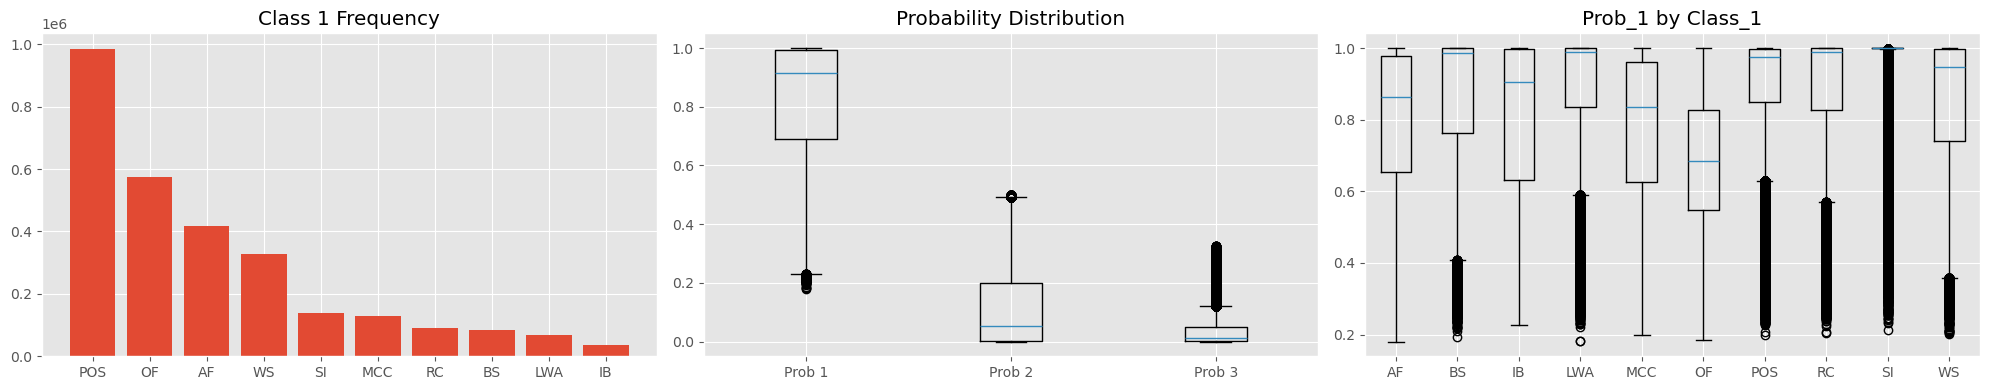

In [30]:
visualize_phenomena(all_dfs)

Each image is classified as `wm1` or `wm2` and have one of the 10 classes according to @wang2018automated, below for easy reference:

"We have identified 10 types of phenomena commonly observed in WV data: pure ocean swell (POS), wind treaks (WS), micro convective cells (MCC), rain cells (RC), iological slicks (BS), sea ice (SI), icebergs (IB), low wind area (LWA), atmospheric fronts (AF), oceanic fronts (OF). Vignettes that do not clearly fall into one of these categories are given a label unknown (UKN)"

<center>

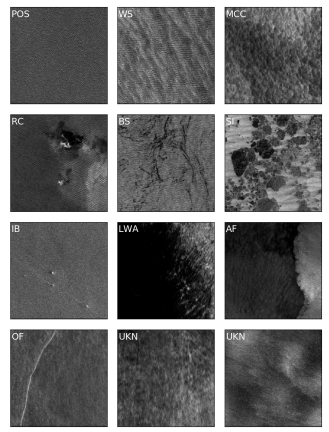

</center>